Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Accuracy: 0.8596491228070176
Confusion Matrix:
 [[ 75  39]
 [  1 170]]


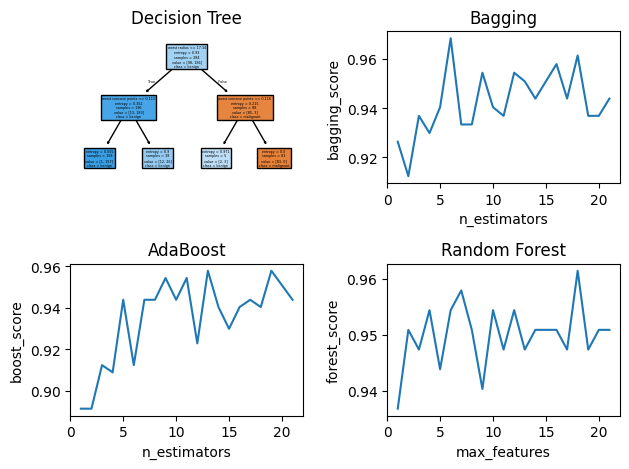

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


bc = load_breast_cancer()
X = bc.data
y = bc.target

fig, axs= plt.subplots(2,2)

feature_names = bc.feature_names
target_names = bc.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)

plot_tree(tree, feature_names=feature_names, class_names=target_names, filled=True, ax = axs[0,0])
axs[0,0].set_title('Decision Tree')


estimator_range = [1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
bagging_score = []

for n_estimators in estimator_range:

    clf = BaggingClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    bagging_score.append(metrics.accuracy_score(y_test, y_pred))

axs[0,1].plot(estimator_range, bagging_score)

axs[0,1].set_title('Bagging')
axs[0,1].set_xlabel('n_estimators')
axs[0,1].set_ylabel('bagging_score')

estimator_range = [1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
boost_score = []

for n_estimators in estimator_range:

    clf = AdaBoostClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    boost_score.append(metrics.accuracy_score(y_test, y_pred))

axs[1,0].plot(estimator_range, boost_score)

axs[1,0].set_title('AdaBoost')
axs[1,0].set_xlabel('n_estimators')
axs[1,0].set_ylabel('boost_score')



max_features = [1, 2 , 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
forest_score = []

for feature in max_features:

    clf = RandomForestClassifier(n_estimators=100, max_features=feature)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    forest_score.append(metrics.accuracy_score(y_test, y_pred))


axs[1,1].plot(max_features, forest_score)
axs[1,1].set_title('Random Forest')
axs[1,1].set_xlabel('max_features')
axs[1,1].set_ylabel('forest_score')

fig.tight_layout()
plt.show()